In [8]:
from data_helpers import *
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from collections import OrderedDict
from matplotlib.colors import LinearSegmentedColormap
import random

# This notebok serves to get better insight on the following points:
- Where were the species sampled in their respective regions
- How many? (nb of classes, least/most sampled)
- Which covariates for which regions
- Visualize the covariate value changes accross a region

In [9]:
elith_data_dir = 'data/elith_2020/Records/'
rasters_dir = 'data/elith_2020/Environment/'

regions_count = len(get_region_list())
regions_comparison_idx = ['total unique species', 'least represented', 'most represented', 'mean representation', 'median representation']
regions_comparison = pd.DataFrame(index = regions_comparison_idx)
    

for i in range(regions_count):
    region = region_list[i]
    species_train = pd.read_csv(elith_data_dir + 'train_po/' + region + 'train_po.csv')

    unique_species_count = species_train['spid'].value_counts()
    total_nb_species = len(unique_species_count)
    least_repr = unique_species_count.values[-1]
    most_repr = unique_species_count.values[0]
    mean_repr = np.mean(unique_species_count.values)
    median_repr = np.median(unique_species_count.values)
    regions_comparison[region] = [total_nb_species, least_repr, most_repr, mean_repr, most_repr]

regions_comparison = regions_comparison.round(0)
regions_comparison


,AWT,CAN,NSW,NZ,SA,SWI
total unique species,40.0,20.0,54.0,52.0,30.0,30.0
least represented,9.0,16.0,2.0,18.0,17.0,36.0
most represented,265.0,740.0,426.0,211.0,216.0,5822.0
mean representation,95.0,253.0,62.0,59.0,74.0,1170.0
median representation,265.0,740.0,426.0,211.0,216.0,5822.0


### Presentation of the covariates of different regions

In [10]:
unique_covs_dict = OrderedDict()
region_covs_names = []

# Create a dataframe of all the unique covariates
for i in range(regions_count):
    region = region_list[i]
    covariates_meta = pd.read_csv(elith_data_dir + 'train_po/01_metadata_' + region + 'train_po.csv')
    cov_name_and_notes = covariates_meta[['Variable_name','Notes']]
    region_covs_names.append(cov_name_and_notes['Variable_name'].values)
    cov_name_to_notes = cov_name_and_notes.set_index('Variable_name').T.to_dict('list')
    unique_covs_dict.update(cov_name_to_notes)
unique_covs_df = pd.DataFrame(unique_covs_dict)

# Check if the regions have these covariates or no and create a dataframe containing the info
checkmark = '✔'
cross = '✘'
covs_to_regions_checklist = unique_covs_df
for i in range(regions_count):
    this_region_covs = region_covs_names[i]
    new_row = {col: checkmark if col in this_region_covs else cross for col in unique_covs_df.columns}
    covs_to_regions_checklist = pd.concat([covs_to_regions_checklist, pd.DataFrame([new_row])], ignore_index=True)

#download a csv of the dataframe because it's too big to see here
covs_to_regions_checklist.to_csv('covs_to_regions_checklist.csv', index=False)
covs_to_regions_checklist


,siteid,spid,x,y,occ,group,bc01,bc04,bc05,bc06,...,calc,ccc,ddeg,nutri,pday,precyy,sfroyy,sradyy,swb,tavecc
0,"Site identifier, unique per site","Species identifier, unique per species. All 30...",x location,y location,Species occurrence,Biological group: tree (only one group for thi...,Annual mean temperature,Temperature seasonality,Max. temperature of warmest period,Min. temperature of coldest period,...,bedrock strictly calcareous vs other type (cat...,coniferous continuous cover,growing degree-days above the threshold of 0°C,soil nutrients index,number of days with rainfall > 1 mm,average yearly precipitation sum,summer frost frequency – number of days,potential yearly global radiation (daily average),site water balance,average temperature of the coldest month
1,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,...,✘,✘,✘,✘,✘,✘,✘,✘,✘,✘
2,✔,✔,✔,✔,✔,✔,✘,✘,✘,✘,...,✘,✘,✘,✘,✘,✘,✘,✘,✘,✘
3,✔,✔,✔,✔,✔,✔,✘,✘,✘,✘,...,✘,✘,✘,✘,✘,✘,✘,✘,✘,✘
4,✔,✔,✔,✔,✔,✔,✘,✘,✘,✘,...,✘,✘,✘,✘,✘,✘,✘,✘,✘,✘
5,✔,✔,✔,✔,✔,✔,✘,✘,✘,✘,...,✘,✘,✘,✘,✘,✘,✘,✘,✘,✘
6,✔,✔,✔,✔,✔,✔,✘,✘,✘,✘,...,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔


### Visualize the data


In [11]:
# Get the geographical data of a random region

region_idx = random.randint(0, 5)
region = region_list[region_idx]

po = pd.read_csv(f"data/elith_2020/Records/train_po/{region}train_po.csv")
po_geo = gpd.GeoDataFrame(po, geometry=gpd.points_from_xy(po.x, po.y))


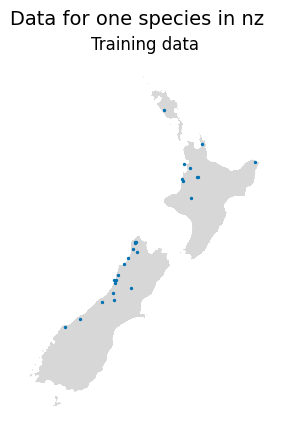

In [14]:
#Visualize all of a species' datapoints
species_in_region = get_species_list(region, False)
species_idx = 9
species = species_in_region[species_idx]
region = region.lower()
region_geo = gpd.read_file(f'data/elith_2020/Borders/{region}.gpkg')
fig, ax1 = plt.subplots(1, 1)

region_geo.plot(ax=ax1, color='#d7d7d7', edgecolor='white')
po_geo[po_geo['spid'] == species].plot(ax=ax1, color='#0072b2', markersize=2)

plt.suptitle(f"Data for one species in {region}", fontsize=14)
ax1.set_title("Training data")
ax1.axis("off")

plt.show()

In [ ]:
# Get names of species with over 200 samples

elith_data_dir = 'data/elith_2020/Records/'
rasters_dir = 'data/elith_2020/Environment/'

regions_count = len(get_region_list())
    

for i in range(regions_count):
    region = region_list[i]
    species_train = pd.read_csv(elith_data_dir + 'train_po/' + region + 'train_po.csv')
    unique_species_count = species_train.value_counts(subset="spid")
    for j in range(3):
        print(f"species: {unique_species_count.index[j]} and count {unique_species_count.iloc[j]}")# and count: ")


species: awt06 and count 265
species: awt15 and count 254
species: awt18 and count 242
species: can02 and count 740
species: can15 and count 721
species: can18 and count 612
species: nsw09 and count 426
species: nsw14 and count 315
species: nsw15 and count 236
species: nz05 and count 211
species: nz52 and count 174
species: nz36 and count 170
species: sa26 and count 216
species: sa12 and count 203
species: sa02 and count 150
species: swi06 and count 5822
species: swi28 and count 5528
species: swi13 and count 3357
